# [LAB 06] 4. 데이터 분포 시각화 (2)

- 데이터 타입별 시각화 구분 기분:
  - 연속형 데이터 시각화: .boxplot(), .lineplot(), .kdeplot(), .histplot(), .violinplot(), stripplot(), swarmplot() 
  - 범주형 데이터 시각화: .heatmap()이 유일함!
      - -> 머신러닝의 기반이 됨

- 복수 변수 처리법:
  - Boxplot:
  - Lineplot:
  - KDE plot:
  - Histogram: 

## #01. 준비작업

### 1. 패키지 참조

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

### 2. 데이터 불러오기

In [2]:
origin = load_data('employee_data_40')
origin.head()

[data] https://data.hossam.kr/data/lab06/employee_data_40.xlsx
[desc] 어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 데이터(인덱스, 메타데이터 없음)
[!] Cannot read metadata


,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70


### 3. 데이터 초기화

In [3]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

## #2. 데이터 시각화: Hist + KDE

- 히스토그램에 커널밀도 그래프를 추가한 형태
- by: 'KDE = True' 파라미터 추가 in .histplot()

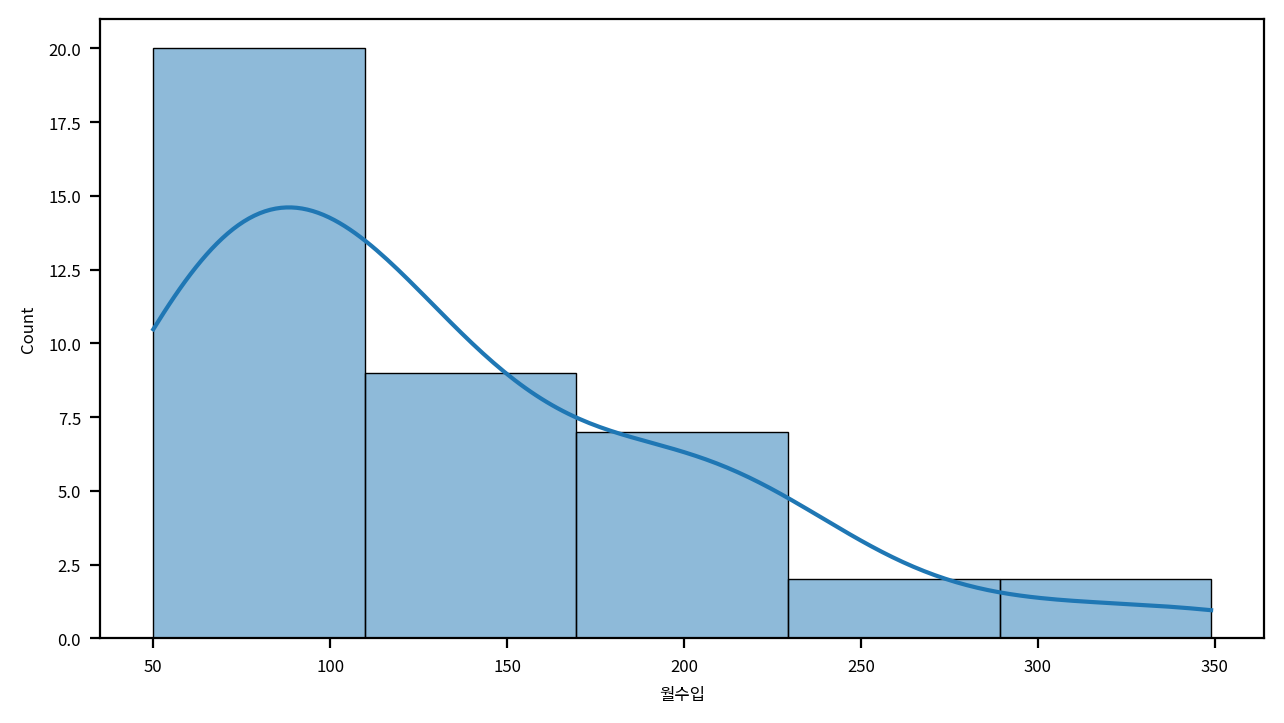

In [ ]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Histogram 그리기: seaborn 사용
sb.histplot(data = origin, x = '월수입', bins = 5,
           edgecolor = "#000000", linewidth = 0.5, kde=True)

# 3) 그래프 꾸미기: 
#ax.set_title("✅", color = '✅', pad = 8, fontsize = 12)
#ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_xlim([✅, ✅])       # x축 범위
#ax.set_ylim([✅, ✅])       # y축 범위
#ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
#plt.savefig('plot.png', dpi = my_dpi * 2)   # 이미지파일 저장                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

## #03. 그 밖의 데이터 분포 시각화 방법

### 1. 바이올린 플롯 (.violonplot())
- 데이터의 분포 형태(치우침, 뾰족함, 꼬리 등)를 한눈에 보여주는 그래프
- 형태: boxplot + KDE 결합 형태
- 좌우 대칭의 '바이올린 모양' 폭: 해당 구간의 데이터 밀도를 의미함
- 중앙엔 보통 중앙값, 사분위수(IQR) 등을 표시해서 박스플롯 정보와 함께 제공함
- 여러 그룹별, 카테고리별 분포 비교에 효과적임
- 장점: 데이터의 세부적 분포 구조(멀티 모달, 꼬리 부분 등)를 boxplotting 보다 더 표현 잘함

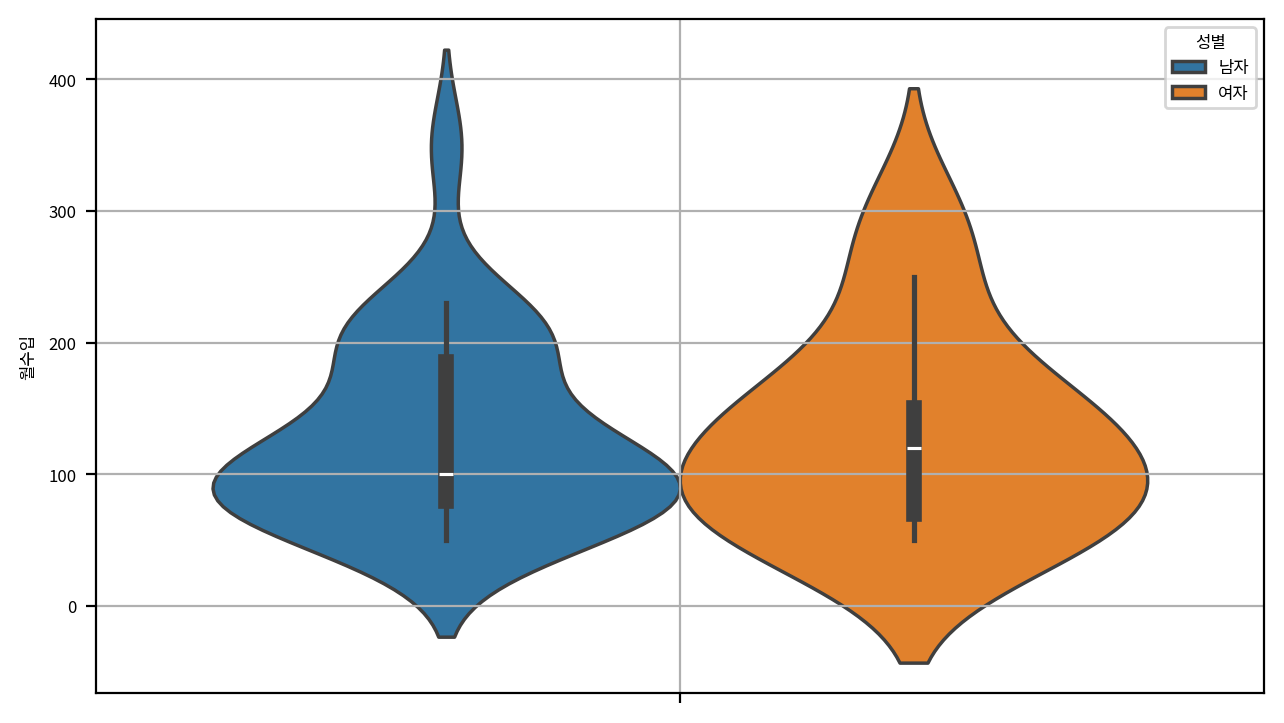

In [6]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) boxplot 그래프 그리기: seaborn 사용
sb.violinplot(data = origin, y = '월수입', hue = '성별')

# 3) 그래프 꾸미기: 
#ax.set_title("✅", color = '✅', pad = 8, fontsize = 12)
#ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_xlim([✅, ✅])       # x축 범위
#ax.set_ylim([✅, ✅])       # y축 범위
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.savefig('plot.png', dpi = my_dpi * 2)   # 이미지파일 저장                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 2. Strip Plot (.stripplot())
- 점 하나하나가 개별 데이터임
- 형태: x축 or y축 기준으로 점들이 가로 or 세로로 scattered된 그래프
- when? 작은 표본이나 정확한 관측값 하나하나를

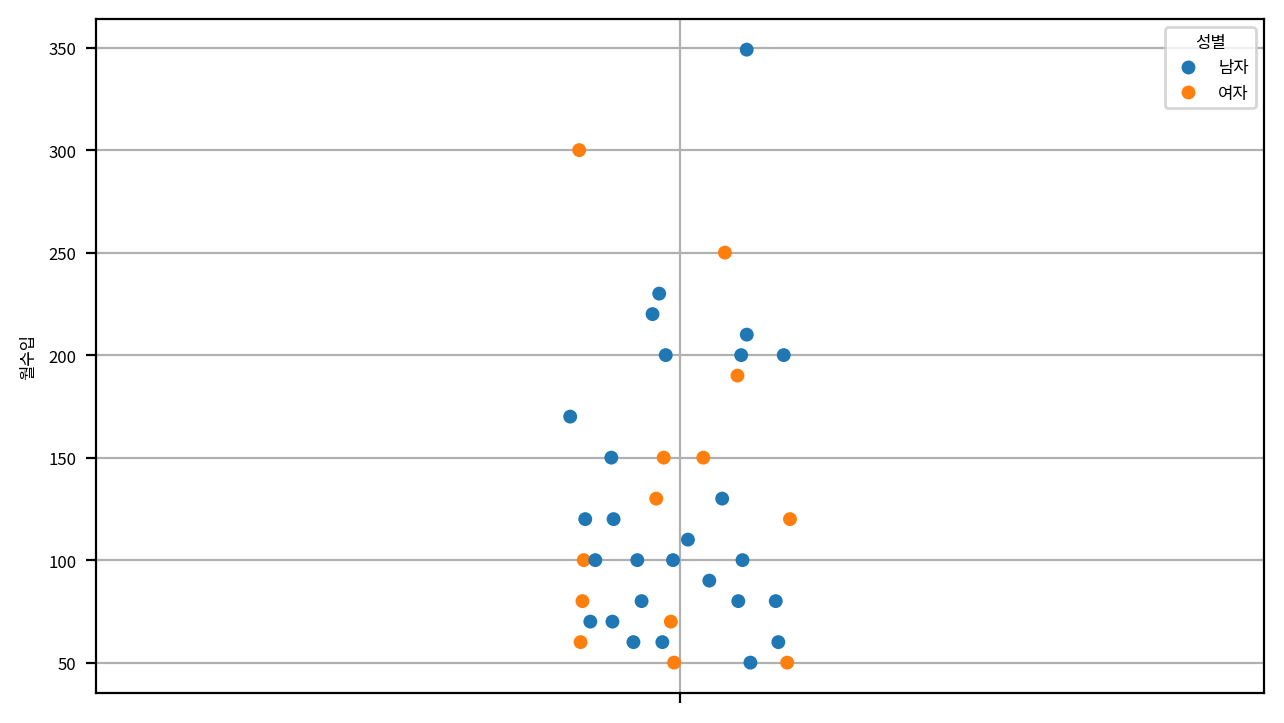

In [4]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) stripplot 그래프 그리기: seaborn 사용
sb.stripplot(data = origin, y = '월수입', hue = '성별')

# 3) 그래프 꾸미기: 
#ax.set_title("✅", color = '✅', pad = 8, fontsize = 12)
#ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_xlim([✅, ✅])       # x축 범위
#ax.set_ylim([✅, ✅])       # y축 범위
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.savefig('plot.png', dpi = my_dpi * 2)   # 이미지파일 저장                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 3. Swarm Plot (add parameter: jitter=True)
- 탄생배경: strip plot에서 점(개별 데이터)들의 겹치는 정도를 개선하기 위해 만들어짐
- 원래 스트립플롯의 기본설정은 jitter=False임
- strip plot처럼 개별 데이터 점을 그대로 표시하는 분포 시각화
- 단, 데이터 점들이 서로 겹치지 않도록 자동으로 배치해주는 알고리즘 사용
  - 이 점 말곤 strip plot과 같음
- 관측값 하나하나를 보면서도 밀도랑 구조를 직관적으로 파악 가능
- 표본 수가 많아도 strip plot보다 가독성이 훨씬 좋음
- 범주형 그룹별 데이터의 실제 분포 형태를 비교할 때 유용

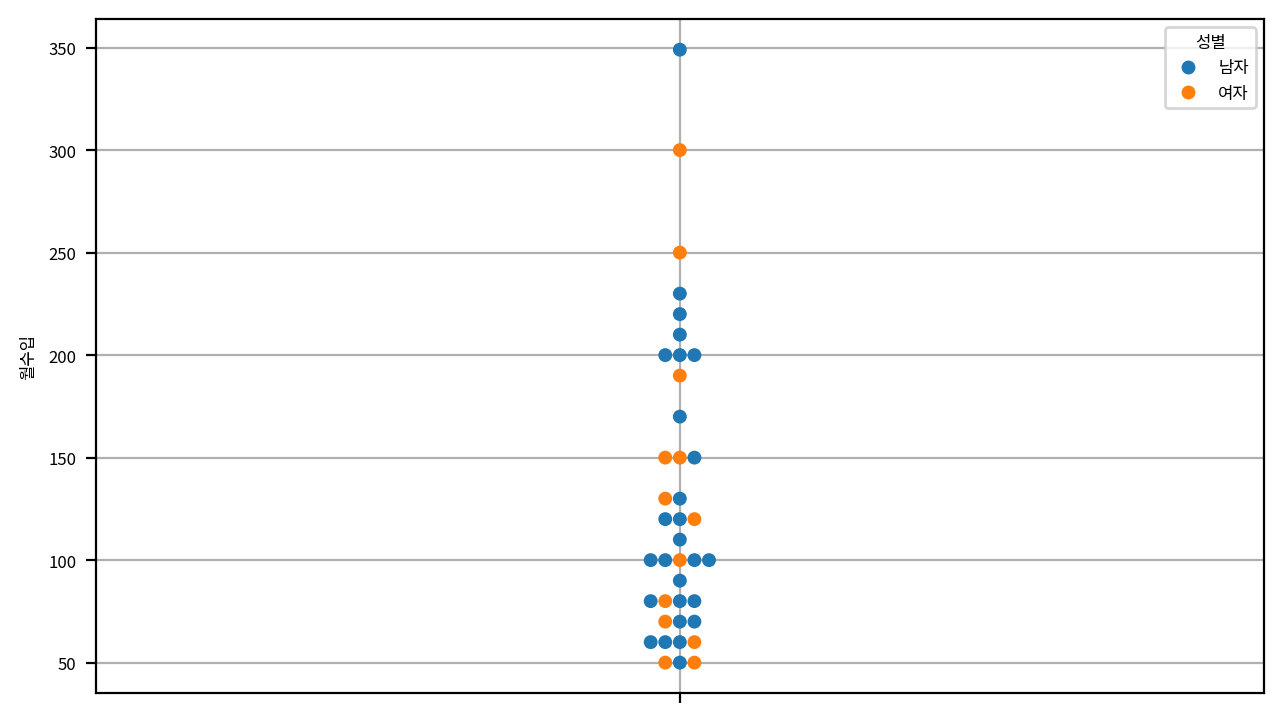

In [5]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) swarmplot 그래프 그리기: seaborn 사용
sb.swarmplot(data = origin, y = '월수입', hue = '성별')

# 3) 그래프 꾸미기: 
#ax.set_title("✅", color = '✅', pad = 8, fontsize = 12)
#ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_xlim([✅, ✅])       # x축 범위
#ax.set_ylim([✅, ✅])       # y축 범위
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.savefig('plot.png', dpi = my_dpi * 2)   # 이미지파일 저장                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료